In [265]:
using Pkg
using Plots
Pkg.precompile()

## Modelo de Ising 2D — MCMC (Metropolis)

### Hamiltoniano

El modelo de Ising bidimensional se describe mediante el Hamiltoniano:

$\
E(s_i)=\mathcal{H}(s_i)= -J \sum_{\langle i,j \rangle} s_i s_j - h \sum_i s_i,
\qquad s_i = \pm 1
$

donde:
- $s_i$ representa el spin en el sitio $i$,
- $J$ es la constante de acoplamiento,
- $h$ es el campo externo,
- $\langle i,j \rangle$ indica pares de vecinos más cercanos.

---

### Variación de energía al invertir un spin

Sea $\mathbf{s}$ la configuración actual y $\mathbf{s}^{(i)}$ aquella donde el spin $s_i$ ha sido invertido ($s_i \rightarrow -s_i$). La variación energética se define como:

$\
\Delta E = \mathcal{H}(\mathbf{s}^{(i)}) - \mathcal{H}(\mathbf{s})
$

$\
\Delta E = \mathcal{H}(-s_i) - \mathcal{H}(s_i)
$


---

### Regla de aceptación (Metropolis)

Definimos el parámetro inverso de temperatura térmica como $ \beta = 1 / (k_B T) $.  
La probabilidad de aceptar la inversión del spin es:

$\
P_{\text{aceptar}} = \min \left( 1,\; e^{-\beta \Delta E} \right)
$

equivalentemente,

$\
P_{\text{aceptar}} =
\begin{cases}
1, & \Delta E \le 0 \\
e^{-\beta \Delta E}, & \Delta E > 0
\end{cases}
$

---

### Procedimiento MCMC (Metropolis)

1. Inicializar los spins $s_i = \pm 1$ aleatoriamente.
2. Repetir para cada intento de actualización:
   - Seleccionar un sitio $i$ aleatoriamente.
   - Calcular $\Delta E$.
   - Generar $u \sim \mathcal{U}(0,1)$ y aceptar el cambio si $u < \min(1, e^{-\beta \Delta E})$.
3. Continuar el proceso durante múltiples iteraciones.
4. Descartar las muestras durante la fase de equilibrio térmico.
5. Promediar observables físicos (energía, magnetización, etc.) sobre configuraciones no correlacionadas.

---


In [266]:
function hamiltonian(J,h,S,si,i,j,L)
    
    periodic(k) = mod(k - 1, L) + 1

    vecinos =
        S[periodic(i+1), j] +
        S[periodic(i-1), j] +
        S[i, periodic(j+1)] +
        S[i, periodic(j-1)]

    H = -J * (si * vecinos)  + h *si
    
end

hamiltonian (generic function with 1 method)

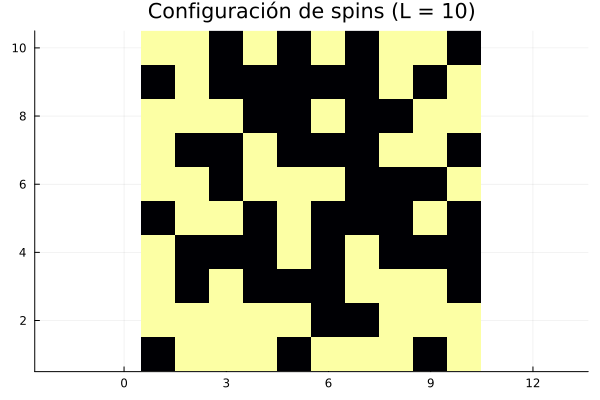

In [267]:
L = 10
S = rand([-1, 1], L, L)
J = 1
h = 0
T = 1
Kb = 1
Beta = 1/(Kb*T)

heatmap(S,
    aspect_ratio=:equal,
    colorbar=false,
    title="Configuración de spins (L = $L)"
)


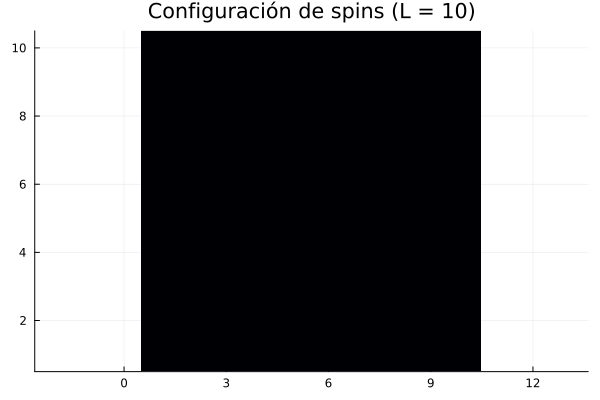

In [268]:
for _ in 1:10000
    i = rand(1:L)
    j = rand(1:L)
    si = S[i,j]
    si_test = -1*si 

    ΔE =  hamiltonian(J,h,S,si_test,i,j,L) - hamiltonian(J,h,S,si,i,j,L)

    if rand() < min(1,exp(-ΔE*Beta)) 
        S[i,j] = si_test
    end
end


heatmap(S,
    aspect_ratio=:equal,
    colorbar=false,
    title="Configuración de spins (L = $L)"
)
